<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Introducción a librerías comunes de *Machine Learning*:
    * Pandas
    * Numpy
    * Sklearn
    * Matplotlib
    * Otro..
* Implementación de Perceptrón y variantes.
* Implementación de método aprendizaje online (Gradiente descendente).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 6 de Septiembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Perceptrón a mano

<hr style="height:2px;border:none"/>

<a id="primero"></a>
## 1. Perceptrón a mano

<img src="https://miro.medium.com/max/1838/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="40%"  />

En esta sección se le pedirá que implemente el algoritmo online del *perceptrón* [[2]](#refs) para aprender una función de separación lineal en un problema de clasificación binaria (0 o 1) a través de la función de *treshold*. Un algoritmo online, como el caso del *perceptrón*, aprende de una instancia de dato a la vez $(x^{(i)},y^{(i)})$, dentro de un conjunto de datos $\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), \ldots, (x^{(N)},y^{(N)})  \}$, donde la predicción de la clase para cada instancia es través de la función de *treshold*:

$$
\hat{y_i} = f(x^{(i)};w,b) = \left\{ \begin{array}{lc}
       1 &  si \ \sum_j w_j \cdot x^{(i)}_j +b \geq \theta \\
       0 &  si \ \sum_j w_j \cdot x^{(i)}_j +b < \theta
     \end{array} \right.
$$


Donde $\theta = 0$. Recordar que el *bias* $b$ se puede incluir dentro de los pesos/parámetros $w$ si se agrega una columna extra de 1's a los datos de entrada $x$ (*como se ve en la imagen anterior*). 

Para lo que sigue de la actividad sólo podrá utilizar *numpy* (para operaciones de algebra lineal).

> a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.

> b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.

> c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.
> <div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(N) ] #add columns of 1's if you want
```
Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado.

> d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.

> e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.


### ¿Qué sucede al variar la función objetivo del problema? 
Si utilizáramos la función de pérdida *binary cross entropy*, que castiga de manera suave los valores en que se equivoca el modelo a través de que el valor de salida sea una confiabilidad $g(x; w,b) \in [0,1]$.
$$
\ell (y, \ g(x;w,b)) = - y \cdot \log{(g(x;w,b))} - (1-y) \cdot \log{(1-g(x;w,b))}
$$

Realice una modificación al perceptrón para que entregue como salida una confiabilidad continua entre 0 y 1. Una buena aproximación de la función *treshold* (con $\theta=0$) del perceptrón es la función sigmoidal.

<img src="https://i.imgur.com/lr6F3Ur.png" width="60%"  />

Ésto sería modelar el perceptrón como:
$$
g(x^{(i)};w,b) = p(y=1|x^{(i)}) = \sigma \left( \sum_j w_j \cdot x^{(i)}_j +b \right)
$$

Con $\sigma$ la función sigmoidal de la forma $\sigma(\xi) = 1/(1+e^{-\xi}) $, la cual tiene una derivada cíclica que hace más fácil el cálculo: $\sigma'(\xi) = \sigma(\xi) (1-\sigma(\xi))$

> f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.

> g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow +\infty$)*.

> h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.

> i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.

$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$

> j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.

<H3> Breve explicación de la tarea: </H3>

En esta tarea se trabaja con el algoritmo del perceptrón, el cual realiza una clasificación binaria de forma lineal. En primer lugar, se implementó este algoritmo de forma completamente manual, para luego graficar el error obtenido para cada uno de los ejemplos de aprendizaje utilizados, luego, se implementó una variante del algoritmo de perceptrón clásico en la que se introdujo un kernel de tamaño fijo que almacenara una cantidad de los ejemplos de aprendizaje, para en base a estos calcular la función clasificadora, utilizando además en este proceso una función de kernel, que en este caso fue el producto punto, graficando nuevamente los errores de entrenamiento obtenidos en este caso, finalmente, se implementó una segunda variante, la cual en este caso usaba la función sigmoidal para la clasificación, y la función de cross binary entropy para la pérdida, graficando también los errores.

In [134]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from time import time
import decimal
import matplotlib.pyplot as plt


#se importan las librerías a usar

In [135]:
#definición de la función f(x) usada en el perceptrón

def net_input(w, X,u):
        """Calcular el valor z (net input)"""
        # z = w · x + theta
        z = np.dot(X, w) - u
        if (z>0):
            return 1
        else:
            return 0
    

 

In [136]:
#definición de perceptrón como tal

errors=[]

def training(data_x,data_y,N,pas):
    tasa=0.1
    num=len(data_x[0])
    weights=np.zeros((1,num))
    umbral=0.5
    for i in range(pas):
        num=0
        error=0
        for val in data_x:
            res=net_input(weights.transpose(),val,umbral)
            #ver que hacer con el error
            e=res-data_y[num]
            if (e!=0):
                error+=1
                for i, valor in enumerate(val):
                    weights[0][i] += tasa * error * valor
                    umbral +=tasa*valor
            errors.append(e)
            num=num+1
    return weights
        
        
            
    
    

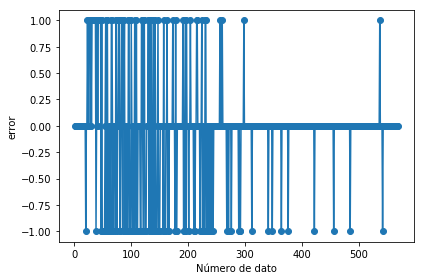

El tiempo de ejecucion fue: 0.0049860477447509766


In [137]:
#se entrena el perceptrón con los datos indicados


errors=[]

from sklearn.datasets import load_breast_cancer 
X_train,Y_train = load_breast_cancer(return_X_y=True) 
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train) 


tiempo_inicial = time() 
ret=training(X_train,Y_train,len(X_train),1)
tiempo_final = time() 




# Graficamos el si el perceprtón entrega el valor correcto en cada iteración
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Número de dato')
plt.ylabel('error')
plt.tight_layout()
plt.show()

tiempo_ejecucion = tiempo_final - tiempo_inicial 
print ('El tiempo de ejecucion fue:',tiempo_ejecucion) #En segundos
 

In [138]:
#definición de función clasificadora

def classi(a, X,Y,z,start):
    res=0
    s=start
    for i,xi in enumerate(X):
        suma=a[i]*Y[s]*np.dot(xi,z)
        res+=suma
        s+=1
    return np.sign(res)


#definición de forgetrón como tal

errors=[]

def forget(data_x,data_y,pas,K):
    tasa=0.1
    alphas=np.zeros((1,K))
    ex=[]
    for i in range(pas):
        num=0
        pos=0
        error=0
        ini_y=0
        for indice,val in enumerate(data_x):
            res=classi(alphas[0],ex,data_y,val,ini_y)
            #ver que hacer con el error
            e=np.sign(res-data_y[num])
            if (indice>K-1):
                ini_y+=1
            if (pos==K):
                pos=0
            if (len(ex)==K):
                ex[pos]=val
            else:
                ex.append(val)
            if (res!=data_y[num]):
                error+=1
                alphas[0][pos]+=1
            errors.append(e)
            num=num+1
            pos+=1
    para=[alphas,ex]
    return para


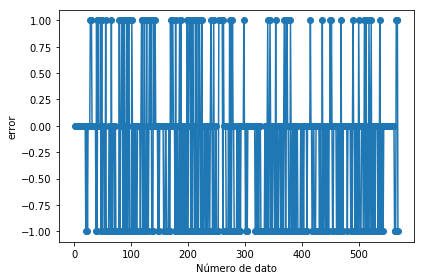

El tiempo de ejecucion fue: 0.013962984085083008


In [139]:
#uso de datos con forgetron, con kernel de tamaño 10

errors=[]


tiempo_inicial = time() 
ret=forget(X_train,Y_train,1,10)
tiempo_final = time() 

# Graficamos el error obtenido en cada iteración del forgetron
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Número de dato')
plt.ylabel('error')
plt.tight_layout()
plt.show()

tiempo_ejecucion = tiempo_final - tiempo_inicial 
print ('El tiempo de ejecucion fue:',tiempo_ejecucion) #En segundos

Contrario de lo que se podría pensar, se observan más errores que en la implementación normal de un perceptrón, lo que puede deberse a la falta de mayor cantidad de datos para entrenar el learner, el tamaño del kernel, o la función de kernel elegida en este caso.

In [140]:
#definicion de sigmoidal y de g(x;w,b)
def sigmoid(x):
    if (x<-709):
        return 0
    elif (isinstance(x, np.ndarray)):
        return 1 / (1 + decimal.Decimal(np.exp(-x[0])))
    else:
        return 1 / (1 + decimal.Decimal(np.exp(-x))) 

def g(x,w,b):
    return sigmoid((np.dot(w,x)+b))




In [141]:
#def de función de pérdida
def perdida(y,x,w,b):
    a=0
    if (g(x,w,b)<np.float_power(10,-323)):
        a=(np.float_power(10,-323)).ln()
    else:
        a=-y*(g(x,w,b)).ln()
    c=(1-y)*(1-g(x,w,b)).ln()
    return (a-c)



    

In [142]:
#gradiente


def dg(x,w,b):
    one=sigmoid((np.dot(w,x)+b))
    two=decimal.Decimal(1-one)
    three=decimal.Decimal(np.sum(x))
    return one*two*three

def gradperd(y,x,w,b):
    d=-decimal.Decimal(y*(1/g(x,w,b)))*dg(x,w,b)
    c=decimal.Decimal((1-y)*(1/(decimal.Decimal(1-g(x,w,b)))))*dg(x,w,b)
    return c+d





In [143]:
#se modfica el perceptron para incorporar funciones definidas anteriormente

errors=[]

def new_training(data_x,data_y,N,pas):
    tasa=0.1
    num=len(data_x[0])
    weights=np.zeros((1,num))
    umbral=0.5
    for i in range(pas):
        num=0
        for val in data_x:
            res=g(val,weights,umbral)
            e=perdida(data_y[num],val,weights,umbral)
            if (e!=0):
                for i, valor in enumerate(val):
                    weights[0][i] -= float(decimal.Decimal(tasa) *gradperd(data_y[num],valor,weights[0][i],umbral))
            errors.append(e)
            num=num+1
    return weights

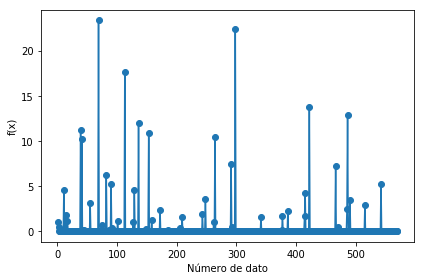

El tiempo de ejecucion fue: 1.160977840423584


In [144]:
#se entrena la modificacion del perceptrón con los datos indicados



errors=[]

tiempo_inicial = time() 
ret=new_training(X_train,Y_train,len(X_train),1)
tiempo_final = time() 

# Graficamos el número de errores en cada iteración
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Número de dato')
plt.ylabel('f(x)')
plt.tight_layout()
plt.show()

tiempo_ejecucion = tiempo_final - tiempo_inicial 
print ('El tiempo de ejecucion fue:',tiempo_ejecucion) #En segundos
 

En comparación con las pérdidas obtenidas para el perceptrón original, se observa que hay más predicciones correctas, representadas como una pérdida de cero, además, se observa que, en el caso de la segunda implementación del perceptrón, hay errores que sobrepasan 0, lo que tiene relación con la forma en que se calculan estos, ya que esto perite tener valores de pérdida entre 0 e infinito, mientras más lejos se esté del 0, más erróneo es el valor obtenido por la función de clasificación, lo que difiere de la forma en que se calculaba el error en el primer caso, ya que éste se calculó de forma discreta, es decir, 1 o -1 representaba error, siendo el primer caso obtener q y que la etiqueta real sea 0, y el segundo el contrario. En conclusión, la segunda implementación resulta ser mejor a la primera. 

<H3> Conclusión: </H3>

En conclusión, el algoritmo clásico del perceptrón, a pesar de ser relativamente sencillo, es fundamental en el área de las máquinas de aprendizaje, entregando al inicio de su entrenamiento gran cantidad de errores, los que disminuyen considerablemente en el tiempo de acuerdo a la cantidad de datos disponibles para entrenarlo, lo que permite que éste tenga una certeza bastante alta. Además, es posible mejorar este algoritmo mediante cambios de distinta naturaleza, siendo uno de estos la inclusión de una diferente función objetivo , y, por consiguiente, de pérdida, aumentando con esto la capacidad de clasificación del algoritmo clásico del perceptrón; otro cambio posible incluye la inserción de un kernel y una función de kernel en la función clasificadora, sin embargo, en este caso se debe tener mucho cuidado en la función de kernel utilizada, ya que esto podría provocar un mal resultado en la forma de clasificar.

<a id="refs"></a>
### Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] STEPHEN, I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on neural networks, 50(2), 179.  
[3] Dekel, O., Shalev-Shwartz, S., & Singer, Y. (2006). *The Forgetron: A kernel-based perceptron on a fixed budget*. In Advances in neural information processing systems (pp. 259-266).  
[4] Ruder, S. (2016). *An overview of gradient descent optimization algorithms*. arXiv preprint arXiv:1609.04747.  